# Education Loan Eligibility / Approval Prediction


Project Name: Education Loan Approval Prediction

ML Level: Level 3

Dataset Name: LoanApprovalPrediction.csv (or as applicable)

Project Type: Binary Classification

Problem Type: Financial / Credit Risk Assessment

Main Goal: Predict whether an applicant’s loan will be approved or not based on financial, personal, and credit-related features

📌 Problem Statement
Financial institutions receive thousands of loan applications every month. To automate and improve the decision-making process, a machine learning model is needed to predict whether an applicant’s loan should be approved based on factors like income, credit history, loan amount, employment status, and more.


📁 About the Dataset
Source: Public datasets (Kaggle or similar)

Total Records: ~600–700

Features:

Categorical: Gender, Married, Education, Self_Employed, Credit_History, etc.

Numerical: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

Target Variable: Loan_Status (Y = Approved, N = Not Approved)

Missing Values: Yes — some features may need imputation

Encoding Needed: Yes — label encoding or one-hot for categorical features



In [31]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv(r"D:\Real ML\Level 3\Loan\train.csv")
df.describe
df.head

<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

EDA


In [33]:
print("🔍 Shape of dataset:", df.shape)
print("\n📌 Column Names:\n", df.columns.tolist())
print("\n📊 Data Types:\n", df.dtypes)

print("\n📈 Descriptive Statistics:\n", df.describe())

# Check for missing values
print("\n❓ Missing Values:\n", df.isnull().sum())

# Check for duplicates
print("\n📌 Duplicated Rows:", df.duplicated().sum())

# Target variable distribution
print("\n⚖️ Target Distribution:")
print(df['Loan_Status'].value_counts(normalize=True))


🔍 Shape of dataset: (614, 13)

📌 Column Names:
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

📊 Data Types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

📈 Descriptive Statistics:
        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.

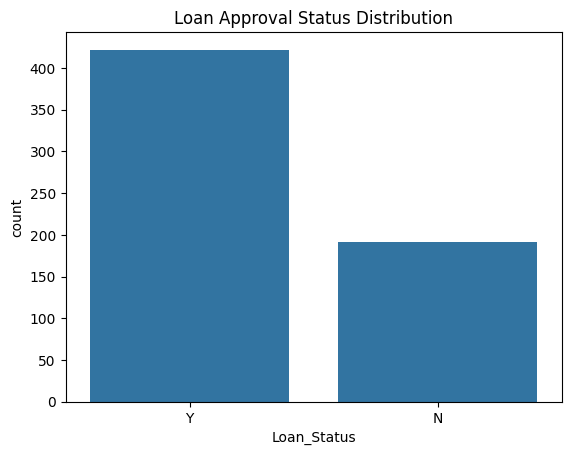

In [34]:
sns.countplot(data=df, x='Loan_Status')
plt.title('Loan Approval Status Distribution')
plt.show()


Preprocessing

In [35]:
# Fill categorical features with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Fill numerical features with median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

# Drop Loan_ID as it's just a unique identifier
df.drop('Loan_ID', axis=1, inplace=True)


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Binary categorical columns: Yes/No, Male/Female, Graduate/Not Graduate
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Replace '3+' in Dependents with 3 (convert to int)
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

# One-hot encode nominal feature: 'Property_Area'
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select numeric columns to scale
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Apply scaling
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,1,False,True
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,False,False
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,1,False,True
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,1,False,True
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,1,False,True


Train Test

In [38]:
# Separate features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [39]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (491, 12)
Testing set shape: (123, 12)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\n📘 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# 2. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\n🌳 Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# 3. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\n🌲 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 4. Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\n📈 SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


📘 Logistic Regression
Accuracy: 0.8617886178861789
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123


🌳 Decision Tree
Accuracy: 0.7317073170731707
              precision    recall  f1-score   support

           0       0.56      0.61      0.58        38
           1       0.82      0.79      0.80        85

    accuracy                           0.73       123
   macro avg       0.69      0.70      0.69       123
weighted avg       0.74      0.73      0.73       123


🌲 Random Forest
Accuracy: 0.8292682926829268
              precision    recall  f1-score   support

           0       0.77      0.63      0.70        38
           1       0.85      0.92      0.88        85

    accuracy                          


🗳️ Hard Voting Classifier
Accuracy: 0.8455284552845529
              precision    recall  f1-score   support

           0       0.83      0.63      0.72        38
           1       0.85      0.94      0.89        85

    accuracy                           0.85       123
   macro avg       0.84      0.79      0.81       123
weighted avg       0.84      0.85      0.84       123


🧠 Soft Voting Classifier
Accuracy: 0.8211382113821138
              precision    recall  f1-score   support

           0       0.81      0.55      0.66        38
           1       0.82      0.94      0.88        85

    accuracy                           0.82       123
   macro avg       0.82      0.75      0.77       123
weighted avg       0.82      0.82      0.81       123



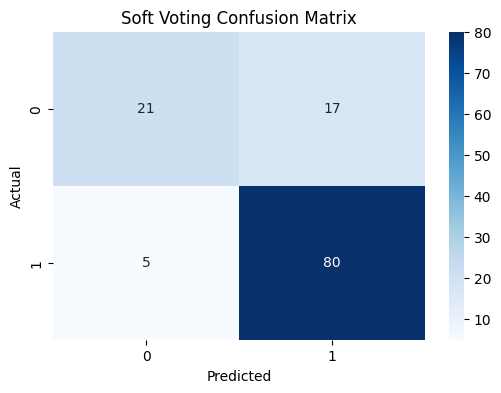

In [41]:

# Hard Voting (based on majority vote)
voting_hard = VotingClassifier(
    estimators=[('lr', lr), ('dt', dt), ('rf', rf), ('svm', svm)],
    voting='hard'
)
selected_features = X.columns.tolist()
joblib.dump(selected_features, 'feature_list.pkl')
voting_hard.fit(X_train, y_train)
y_pred_hard = voting_hard.predict(X_test)
print("\n🗳️ Hard Voting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_hard))
print(classification_report(y_test, y_pred_hard))

# Soft Voting (based on predicted probabilities)
voting_soft = VotingClassifier(
    estimators=[('lr', lr), ('dt', dt), ('rf', rf), ('svm', svm)],
    voting='soft'
)
voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)
print("\n🧠 Soft Voting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_soft))
print(classification_report(y_test, y_pred_soft))

# ------------------ Confusion Matrix ------------------

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_soft), annot=True, fmt="d", cmap="Blues")
plt.title("Soft Voting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [42]:
import joblib

# Save the trained logistic regression model
joblib.dump(lr, 'loan_approval_model.pkl')

# Save your scaler and encoder if used (e.g., StandardScaler or OneHotEncoder)
joblib.dump(scaler, 'scaler.pkl')  # if used
# joblib.dump(encoder, 'encoder.pkl')  # Uncomment if you used encoding and want to save it


['scaler.pkl']

In [43]:
def predict_loan_approval(input_data):
    import numpy as np
    import joblib

    # Load the saved model and scaler
    model = joblib.load('loan_approval_model.pkl')
    scaler = joblib.load('scaler.pkl')

    # Input example: list or array with the same feature order as training
    # Example:
   

    # Create a DataFrame for input
    import pandas as pd
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Apply preprocessing (label encoding or one-hot if needed)
    for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
        input_df[col] = label_encoder[col].transform(input_df[col])  # use your stored encoders

    # Feature scaling
    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction = model.predict(input_scaled)

    return "Loan Approved ✅" if prediction[0] == 1 else "Loan Rejected ❌"


In [44]:
input_data = ['Male', 'Yes', '1', 'Graduate', 'No', 5000, 2000, 128, 360.0, 1.0, 'Urban']
print(predict_loan_approval(input_data))

ValueError: 12 columns passed, passed data had 11 columns